In [11]:
library(dplyr)
library(tidyr)
library(ggplot2)

data <- read.csv("../Results/runtime.txt", sep=" ", header=F)

colnames(data) <- c("Method", "Set", "Seconds")
data$Seconds <- as.numeric(data$Seconds)

methods <- c("Seurat", "CellID", "SingleR", "SCN", "ItClust", "MLP")
data = data %>% separate(Set,into=c("Type", "Size", "Nr"), sep = "_")

data$Size <- as.numeric(data$Size)
output <- "../Results/"

In [12]:
data <- data[data$Type != "CrossSpecies",]
data$cells[data$Type == "Mono" & data$Size== 42] <- 42*9 
data$cells[data$Type == "Mono" & data$Size== 100] <- 100*8 + 42
data$cells[data$Type == "Mono" & data$Size== 500] <- 500*2 + 42 + 174 + 145 + 148 + 244 + 203 + 104
data$cells[data$Type == "Mono" & data$Size== 1000] <- 1000*2 + 42 + 174 + 145 + 148 + 244 + 203 + 104
data$cells[data$Type == "Mono" & data$Size== 2000] <- 1111+ 1664 + 42 + 174 + 145 + 148 + 244 + 203 + 104
data$cells[data$Type == "Mono" & data$Size== 3000] <- 1111+ 1664 + 42 + 174 + 145 + 148 + 244 + 203 + 104

data$cells[data$Type == "Mosaic" & data$Size== 136] <- 136*9 
data$cells[data$Type == "Mosaic" & data$Size== 100] <- 100*9
data$cells[data$Type == "Mosaic" & data$Size== 500] <- 500*7 + 136 +387
data$cells[data$Type == "Mosaic" & data$Size== 1000] <- 1000*5 + 136 + 387 + 606 + 948
data$cells[data$Type == "Mosaic" & data$Size== 2000] <- 2000*4  + 136 + 387 + 606 + 948 + 1108 
data$cells[data$Type == "Mosaic" & data$Size== 3000] <- 3000*3  + 136 + 387 + 606 + 948 + 1108 + 2674

In [13]:
table(data$cells)
data <- data[data$cells !=  3835,]


  378   842   900  1224  2060  3060  3835  4023  7077 11185 14859 
  180   132   180   174   180   114   354   155   179   152   148 

In [14]:
max(data$Seconds[data$Method=="CellID"])
max(data$Seconds[data$Method=="SCN"])
max(data$Seconds[data$Method=="ItClust"])
max(data$Seconds[data$Method=="MLP"])



[1] 923

[1] 1149

[1] 1454

[1] 5259

`summarise()` has grouped output by 'cells', 'Method', 'Type'. You can override using the `.groups` argument.


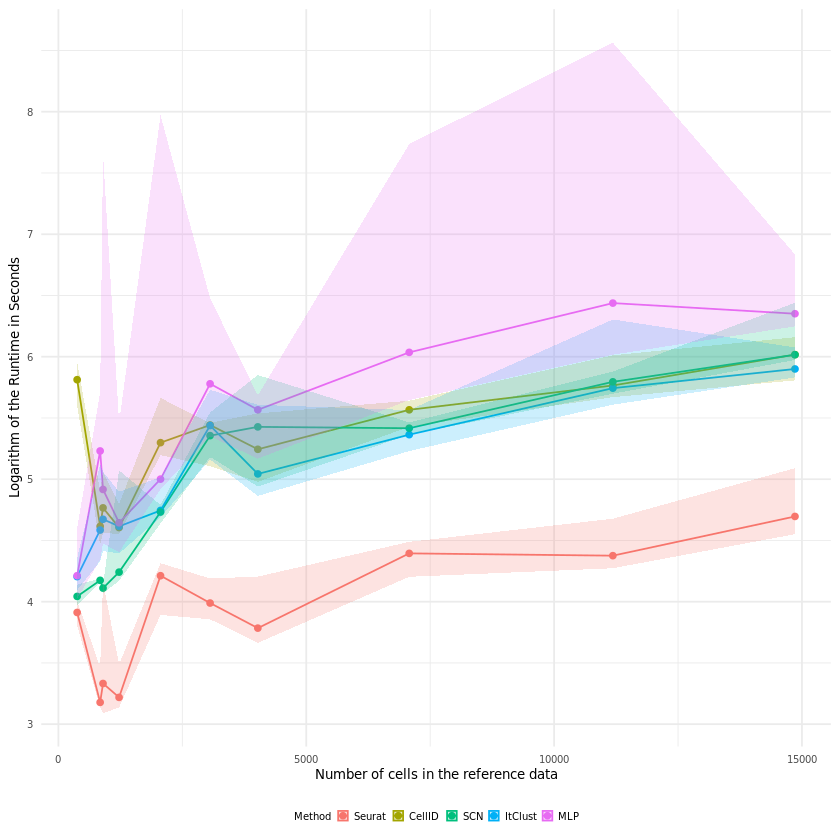

In [15]:
data$Seconds <- log(data$Seconds)
data_summary <- data %>%
                    group_by(cells, Method, Type, Size) %>%
                    summarise(mean = mean(Seconds),
                              sd= sd(Seconds),
                              q25= quantile(Seconds, probs=0.25),
                              q75= quantile(Seconds, probs=0.75),
                              median = median(Seconds)
                             )

plot <- ggplot(data_summary, aes(x=cells, y=median,
                             color=factor(Method, levels = methods),
                             fill=factor(Method, levels = methods)))+
    geom_line() + geom_point() +
    geom_ribbon(aes(ymin=q25, ymax=q75, color=NULL), alpha=0.2)+
    labs(color="Method", fill="Method")+ xlab("Number of cells in the reference data") + 
    ylab("Logarithm of the Runtime in Seconds") + theme_minimal() +
    theme(axis.text=element_text(size=6), axis.title=element_text(size=8),
          plot.title=element_text(size=6, hjust = 0.5),
          legend.title=element_text(size=6), legend.text=element_text(size=6),
          legend.position="bottom",legend.key.size = unit(0.5,"line"))#+facet_grid(cols=vars(Type))
plot

In [16]:
ggplot2::ggsave(paste0(output, "f5_runtime.png"), plot=plot, device = "png",
                dpi=350, width=86 , height = 75,units = "mm",bg = "white")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


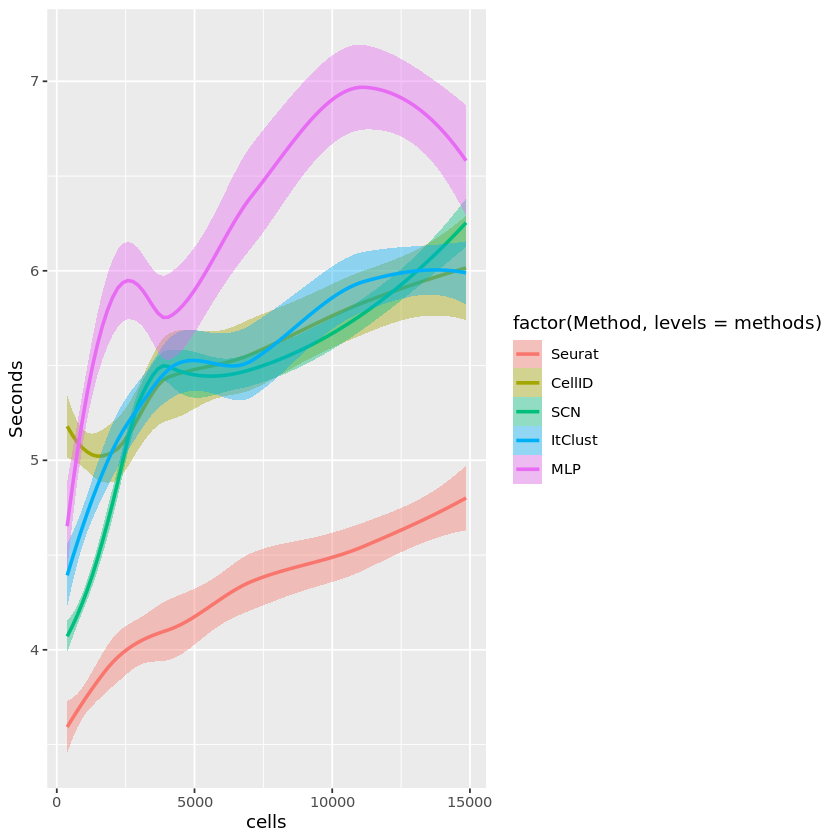

In [8]:
ggplot(data, aes(cells, Seconds,  color=factor(Method, levels = methods),
                             fill=factor(Method, levels = methods)))+geom_smooth()